<a href="https://colab.research.google.com/github/shobanjatoth/Deepleaning-projects/blob/main/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle



mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download "salader/dogs-vs-cats"

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 260MB/s]
100% 1.06G/1.06G [00:04<00:00, 276MB/s]


In [ ]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [ ]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
test=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


Normalization

In [ ]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_df=train.map(process)
test_df=test.map(process)

In [ ]:
Model=Sequential()

In [ ]:
Model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
Model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
Model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
Model.add(Flatten())
Model.add(Dense(128,activation='relu'))
Model.add(Dense(64,activation='relu'))
Model.add(Dense(1,activation='sigmoid'))
Model.summary()
Model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=Model.fit(train_df,epochs=10,validation_data=test_df)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,732,705 (14.24 MB)

 Trainable params: 3,732,705 (14.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 71ms/step - accuracy: 0.5698 - loss: 0.6760 - val_accuracy: 0.7188 - val_loss: 0.5791
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7150 - loss: 0.5576 - val_accuracy: 0.7398 - val_loss: 0.5180
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7990 - loss: 0.4335 - val_accuracy: 0.7546 - val_loss: 0.5555
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8836 - loss: 0.2807 - val_accuracy: 0.7546 - val_loss: 0.7634
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9379 - loss: 0.1550 - val_accuracy: 0.7476 - val_loss: 1.0018
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.9675 - loss: 0.0891 - val_accuracy: 0.7506 - val_loss: 1.2406
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 74ms/step - accuracy: 0.9818 - loss: 0.0591 - val_accuracy: 0.7624 - val_loss: 1.3319
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9834 - loss: 0.0541 - 

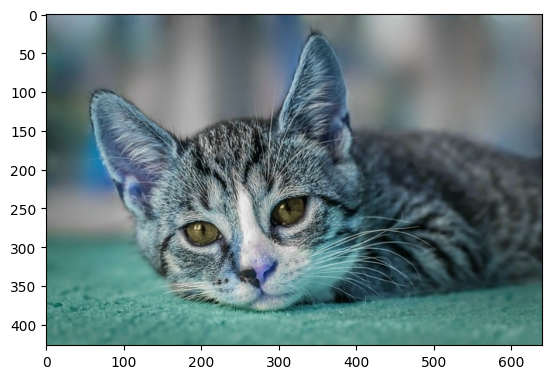

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import cv2

test_image = cv2.imread('test.image.jpg')

# Use imshow to display the image instead of show
plt.imshow(test_image)
plt.show()

test_image = cv2.resize(test_image, (256, 256))

# Reshape the image using numpy's reshape function
test_input = test_image.reshape((1, 256, 256, 3))

Model.predict(test_input)